<a href="https://colab.research.google.com/github/lukebene/Codigos-Treinos/blob/master/postccparte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/' 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.cm as cm
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set(style="whitegrid")

In [0]:
dados = pd.read_csv('/content/gdrive/My Drive/df.csv')

dados.head()

,Passo,Tipo,Valor,Origem,SaldoOrigemVelho,SaldoOrigemNovo,Destino,SaldoDestinoVelho,SaldoDestinoNovo,Fraude,Detectado
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [0]:
dados = dados.drop('Detectado',axis=1)
dados.head()

,Passo,Tipo,Valor,Origem,SaldoOrigemVelho,SaldoOrigemNovo,Destino,SaldoDestinoVelho,SaldoDestinoNovo,Fraude
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [0]:
dados2 = dados.copy() #mais uma copia de segurança do dataset

dados2["HoraDoDia"] = np.nan
dados2.HoraDoDia = dados.Passo % 24


dados2["ErroSaldoOrigem"] = dados.SaldoOrigemNovo + dados.Valor - dados.SaldoOrigemVelho
dados2["ErroSaldoDestino"] = dados.SaldoDestinoNovo + dados.Valor - dados.SaldoDestinoNovo

dados2.head()
#dados= dados[(dados["Tipo"] == "CASH_OUT") | (dados["Tipo"] == "TRANSFER")]

#dados.head()

,Passo,Tipo,Valor,Origem,SaldoOrigemVelho,SaldoOrigemNovo,Destino,SaldoDestinoVelho,SaldoDestinoNovo,Fraude,HoraDoDia,ErroSaldoOrigem,ErroSaldoDestino
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,0.0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,0.0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,0.0,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,1,0.0,181.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,0.0,11668.14


In [0]:
fraude = dados2[dados2["Fraude"] == 1]
valida = dados2[dados2["Fraude"] == 0]


print("Sumario Estatistico do ErroSaldoOrigem em transações Fraudulentas: \n",fraude["ErroSaldoOrigem"].describe())
print("\n Sumario Estatistico do ErroSaldoOrigem em transações Validas: \n",valida["ErroSaldoOrigem"].describe())

Sumario Estatistico do ErroSaldoOrigem em transações Fraudulentas: 
 count    8.213000e+03
mean     1.069233e+04
std      2.651461e+05
min     -7.450581e-09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: ErroSaldoOrigem, dtype: float64

 Sumario Estatistico do ErroSaldoOrigem em transações Validas: 
 count    6.354407e+06
mean     2.013386e+05
std      6.069289e+05
min     -1.000000e-02
25%      3.034305e+03
50%      6.904931e+04
75%      2.499534e+05
max      9.244552e+07
Name: ErroSaldoOrigem, dtype: float64


In [0]:
dados2 = dados2.drop(['Origem','Destino'],axis=1)
dados2= dados2[(dados2["Tipo"] == "CASH_OUT") | (dados2["Tipo"] == "TRANSFER")]

dados2 = pd.get_dummies(dados2,prefix=['Tipo'])
dados2.head()

,Passo,Valor,SaldoOrigemVelho,SaldoOrigemNovo,SaldoDestinoVelho,SaldoDestinoNovo,Fraude,HoraDoDia,ErroSaldoOrigem,ErroSaldoDestino,Tipo_CASH_OUT,Tipo_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,1,0.00,181.00,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,1,0.00,181.00,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,1,213808.94,229133.94,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,1,214605.30,215310.30,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,1,300850.89,311685.89,0,1


In [0]:
import seaborn as sns

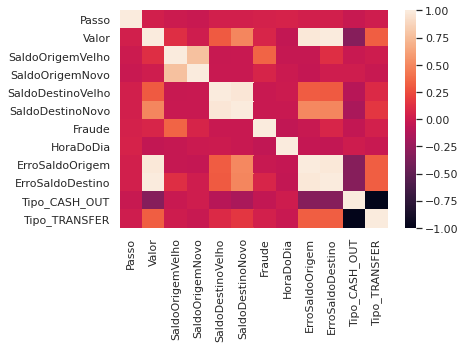

In [0]:
sns.heatmap(dados2.corr())

In [0]:
#dados2=  dados.drop(['Passo'],axis = 1)

dados2.corr()

,Passo,Valor,SaldoOrigemVelho,SaldoOrigemNovo,SaldoDestinoVelho,SaldoDestinoNovo,Fraude,HoraDoDia,ErroSaldoOrigem,ErroSaldoDestino,Tipo_CASH_OUT,Tipo_TRANSFER
Passo,1.000000,0.037007,0.005744,-0.011280,0.037778,0.037475,0.048671,0.058486,0.033936,0.037007,-0.016022,0.016022
Valor,0.037007,1.000000,0.120389,0.018296,0.307133,0.497027,0.070660,-0.041869,0.982838,1.000000,-0.326040,0.326040
SaldoOrigemVelho,0.005744,0.120389,1.000000,0.778826,-0.020403,-0.010029,0.347582,-0.025194,-0.030438,0.120389,-0.013202,0.013202
SaldoOrigemNovo,-0.011280,0.018296,0.778826,1.000000,-0.012277,-0.015439,0.063557,-0.003961,-0.032263,0.018296,0.018726,-0.018726
SaldoDestinoVelho,0.037778,0.307133,-0.020403,-0.012277,1.000000,0.970060,-0.014960,0.000594,0.315245,0.307133,-0.099794,0.099794
SaldoDestinoNovo,0.037475,0.497027,-0.010029,-0.015439,0.970060,1.000000,-0.008978,-0.009042,0.504317,0.497027,-0.157024,0.157024
Fraude,0.048671,0.070660,0.347582,0.063557,-0.014960,-0.008978,1.000000,-0.051230,-0.017149,0.070660,-0.042400,0.042400
HoraDoDia,0.058486,-0.041869,-0.025194,-0.003961,0.000594,-0.009042,-0.051230,1.000000,-0.035916,-0.041869,0.012706,-0.012706
ErroSaldoOrigem,0.033936,0.982838,-0.030438,-0.032263,0.315245,0.504317,-0.017149,-0.035916,1.000000,0.982838,-0.323657,0.323657
ErroSaldoDestino,0.037007,1.000000,0.120389,0.018296,0.307133,0.497027,0.070660,-0.041869,0.982838,1.000000,-0.326040,0.326040


In [0]:
dados2.ErroSaldoOrigem.describe()
dados2.ErroSaldoDestino.describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: ErroSaldoDestino, dtype: float64

In [0]:
RandomState = 3391
seed(2882)

X = dados2.drop(["Fraude"],1)
y = dados2.Fraude
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,test_size=0.4)

scaler = StandardScaler()

scaler.fit(X_treino)

X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

In [0]:
parametersRF = {'n_estimators':50,'oob_score':True,'class_weight': "balanced",'n_jobs':-1,'verbose':2,'random_state':RandomState}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(X_treino, y_treino)
 

predictionsRF = RF.predict(X_teste)
 

CM_RF = confusion_matrix(y_teste,predictionsRF)
CR_RF = classification_report(y_teste,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_teste, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Matrix de Confusao" :CM_RF,"Reporte Estatistico":CR_RF,"Curva Roc":AUC_RF}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min


building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


In [0]:
for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Matrix de Confusao : 
 [[1104849       2]
 [     16    3297]]
Reporte Estatistico : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1104851
           1       1.00      1.00      1.00      3313

    accuracy                           1.00   1108164
   macro avg       1.00      1.00      1.00   1108164
weighted avg       1.00      1.00      1.00   1108164

Curva Roc : 
 0.9975843650484817


In [0]:
tp = 1104849
fp = 2
fn = 16
tn = 3297

acuracia =(tp+tn)/(tp+fp+fn+tn)
acuracia_classe_0 = (tp)/(tp+fp)
acuracia_classe_1 = (tn)/(fn+tn)
precisao = tp/(tp+fp)
revocacao = tp/(tp+fn)
especificidade = tn/(tn+fp)
Fscore = 2*((precisao * revocacao)/(precisao + revocacao))



In [0]:
Fscore

0.9999918541568238

In [0]:
nomes = dados2.columns
nomes = nomes.drop("Fraude",1)

impedancias = pd.Series(RF.feature_importances_,index=nomes).sort_values(ascending=False)
impedancias

ErroSaldoOrigem      0.451685
SaldoOrigemVelho     0.198242
SaldoOrigemNovo      0.108844
SaldoDestinoNovo     0.077877
SaldoDestinoVelho    0.043093
ErroSaldoDestino     0.031257
HoraDoDia            0.028083
Valor                0.022376
Passo                0.021046
Tipo_TRANSFER        0.011552
Tipo_CASH_OUT        0.005947
dtype: float64

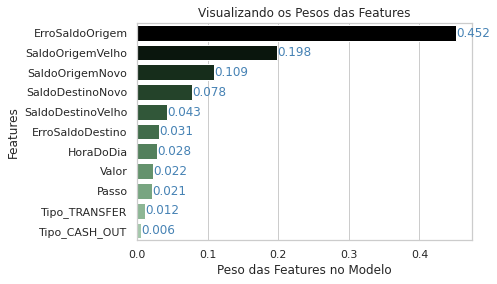

In [0]:
plt.grid(True)
pal =sns.cubehelix_palette(14, start=2, rot=0, dark=0, light=.95, reverse=True)
ax =sns.barplot(x=impedancias,y=impedancias.index, palette=pal)
plt.xlabel('Peso das Features no Modelo')
plt.ylabel('Features')
plt.title("Visualizando os Pesos das Features")

for i,v in enumerate(impedancias):
  plt.text(v, i, str(round(v, 3)), color='steelblue', va="center")

plt.show()

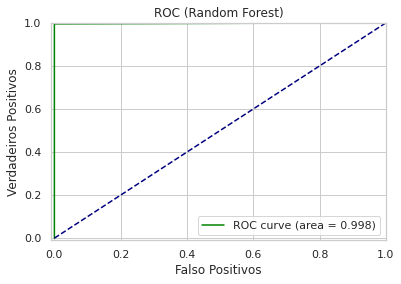

In [0]:

plt.subplot(1, 1, 1)
plt.plot(fprRF, recallRF, color='green', label='ROC curve (area = %0.3f)' % AUC_RF)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.xlabel('Falso Positivos')
plt.ylabel('Verdadeiros Positivos')
plt.title('ROC (Random Forest)')
plt.legend(loc="lower right")
